# Paper Plots

In [ ]:
from matplotlib import pyplot as plt


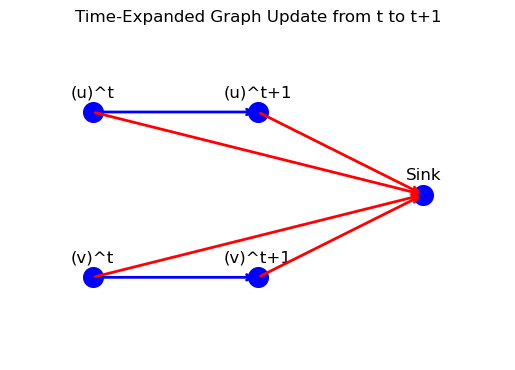

In [2]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Define positions (x,y) for each node in the TEG
# For simplicity, we have:
#   (u)^t       at (0, +1)
#   (v)^t       at (0, -1)
#   (u)^(t+1)   at (2, +1)
#   (v)^(t+1)   at (2, -1)
#   Super sink  at (4,  0)
positions = {
    ("u", "t"): (0, 1),
    ("v", "t"): (0, -1),
    ("u", "t+1"): (2, 1),
    ("v", "t+1"): (2, -1),
    ("sink", None): (4, 0),  # Super sink
}

# Plot the nodes
for node, (x, y) in positions.items():
    if node[0] == "sink":
        label = "Sink"
    else:
        label = f"({node[0]})^{node[1]}"
    ax.scatter(x, y, color='blue', s=200, zorder=3)
    ax.text(x, y + 0.15, label, ha='center', va='bottom', fontsize=12)

# Define edges: each entry is (from_node, to_node, edge_type)
edges = [
    (("u", "t"),    ("u", "t+1"),    'waiting'),
    (("v", "t"),    ("v", "t+1"),    'waiting'),
    (("u", "t"),    ("sink", None), 'flow to sink'),
    (("v", "t"),    ("sink", None), 'flow to sink'),
    (("u", "t+1"),  ("sink", None), 'flow to sink'),
    (("v", "t+1"),  ("sink", None), 'flow to sink'),
]

# Different edge colors for clarity
edge_colors = {
    'waiting': 'blue',
    'flow to sink': 'red',
}

# Draw the edges as arrows
for (n1, n2, etype) in edges:
    (x1, y1) = positions[n1]
    (x2, y2) = positions[n2]
    ax.annotate(
        "",
        xy=(x2, y2),
        xytext=(x1, y1),
        arrowprops=dict(arrowstyle="->", color=edge_colors[etype], linewidth=2),
    )

# Clean up the plot
ax.set_xlim(-1, 5)
ax.set_ylim(-2, 2)
ax.set_aspect('equal', 'box')
ax.axis('off')
plt.title("Time-Expanded Graph Update from t to t+1")
plt.show()

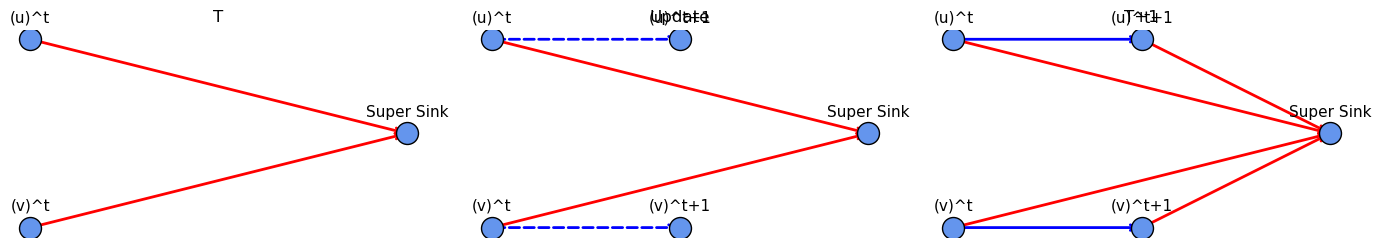

In [4]:
import matplotlib.pyplot as plt

def draw_nodes_and_edges(ax, positions, nodes, edges, node_color='cornflowerblue', edge_styles=None, title=None):
    """
    Utility function to draw a set of nodes and edges on a given Axes object (ax).
    :param ax: matplotlib Axes
    :param positions: dict of node -> (x, y) coordinates
    :param nodes: list of node labels (e.g., ("u","t")) to draw
    :param edges: list of (from_node, to_node, edge_type) describing edges to draw
    :param node_color: color for the node circles
    :param edge_styles: dict mapping edge_type -> dict of arrowprops
    :param title: optional title for the subplot
    """
    if edge_styles is None:
        edge_styles = {}

    # Draw nodes
    for node in nodes:
        (x, y) = positions[node]
        if node[0] == "sink":
            label = "Super Sink"
        else:
            label = f"({node[0]})^{node[1]}"
        ax.scatter(x, y, color=node_color, s=250, zorder=3, edgecolor='black')
        ax.text(x, y + 0.15, label, ha='center', va='bottom', fontsize=11)

    # Draw edges
    for (n1, n2, etype) in edges:
        # Only draw the edge if both endpoints are in our 'nodes' set
        if n1 in nodes and n2 in nodes:
            (x1, y1) = positions[n1]
            (x2, y2) = positions[n2]
            style = edge_styles.get(etype, dict(arrowstyle="->", color='gray', linewidth=2))
            ax.annotate(
                "",
                xy=(x2, y2), xytext=(x1, y1),
                arrowprops=style,
                zorder=2
            )

    ax.set_aspect('equal', 'box')
    ax.axis('off')
    if title:
        ax.set_title(title, fontsize=12)

def visualize_three_stage_teg_update():
    # Positions for our nodes in 2D. We'll represent:
    #   (u)^t and (v)^t  at x=0,
    #   (u)^(t+1) and (v)^(t+1) at x=2,
    #   super sink at x=4
    positions = {
        ("u", "t"):     (0,  1),
        ("v", "t"):     (0, -1),
        ("u", "t+1"):   (2,  1),
        ("v", "t+1"):   (2, -1),
        ("sink", None): (4,  0),
    }

    # Edges that will eventually exist in the final TEG:
    #   1) "waiting" edges from time t to time t+1
    #   2) "flow to sink" edges from each node to the sink
    edges_all = [
        (("u", "t"),   ("u", "t+1"),   'waiting'),
        (("v", "t"),   ("v", "t+1"),   'waiting'),
        (("u", "t"),   ("sink", None), 'flow_to_sink'),
        (("v", "t"),   ("sink", None), 'flow_to_sink'),
        (("u", "t+1"), ("sink", None), 'flow_to_sink'),
        (("v", "t+1"), ("sink", None), 'flow_to_sink'),
    ]

    # Configure arrow styles for each edge type
    edge_styles = {
        'waiting': {
            'arrowstyle': '->',
            'color': 'blue',
            'linewidth': 2
        },
        'flow_to_sink': {
            'arrowstyle': '->',
            'color': 'red',
            'linewidth': 2
        }
    }

    # --------------- 1) BEFORE UPDATE (time t only) ---------------
    # We only have (u)^t, (v)^t, and the sink, plus edges from time t to the sink.
    nodes_stage1 = [
        ("u", "t"),
        ("v", "t"),
        ("sink", None),
    ]
    edges_stage1 = [
        e for e in edges_all
        if e[2] == 'flow_to_sink' and e[0][1] == 't'
    ]
    # That means: only edges from (u, t)->sink and (v, t)->sink.

    # --------------- 2) DURING UPDATE (adding t+1) ---------------
    # Now we add the new layer (u)^(t+1), (v)^(t+1) and the "waiting" edges,
    # but let’s highlight them differently (e.g., dotted or half-transparent).
    nodes_stage2 = [
        ("u", "t"),
        ("v", "t"),
        ("u", "t+1"),
        ("v", "t+1"),
        ("sink", None),
    ]
    edges_stage2 = [
        # All old edges from stage1
        *edges_stage1,
        # plus the "waiting" edges from t to t+1 (u->u, v->v),
        # but let's mark them with a special style so they appear 'in progress'
        (("u", "t"),   ("u", "t+1"), 'waiting_temp'),
        (("v", "t"),   ("v", "t+1"), 'waiting_temp'),
    ]
    # We'll define a custom style 'waiting_temp'
    edge_styles['waiting_temp'] = {
        'arrowstyle': '->',
        'color': 'blue',
        'linewidth': 2,
        'linestyle': 'dashed'
    }

    # --------------- 3) AFTER UPDATE (time t+1 fully integrated) ---------------
    # We have the entire final TEG with waiting edges (solid) and flow-to-sink edges from both t and t+1.
    nodes_stage3 = list(positions.keys())  # all nodes
    edges_stage3 = edges_all  # everything

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    # Stage 1
    draw_nodes_and_edges(
        ax=axes[0],
        positions=positions,
        nodes=nodes_stage1,
        edges=edges_stage1,
        edge_styles=edge_styles,
        title="T"
    )

    # Stage 2
    draw_nodes_and_edges(
        ax=axes[1],
        positions=positions,
        nodes=nodes_stage2,
        edges=edges_stage2,
        edge_styles=edge_styles,
        title="Update"
    )

    # Stage 3
    draw_nodes_and_edges(
        ax=axes[2],
        positions=positions,
        nodes=nodes_stage3,
        edges=edges_stage3,
        edge_styles=edge_styles,
        title="T+1"
    )

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_three_stage_teg_update()
